In [5]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    #"font.serif": ["Palatino"],
})
from scipy.integrate import solve_ivp

# Building Quiz_03
![hanging spring](../images/hanging-spring.svg)

The link shown above is resting in equilibrium. There is spring that can slide left-right attached to the support above. Gravity acts downward. The spring applies no force when $x_A=0~m$. The link has mass, $m=1~kg$, spring stiffness, $k=100~N/m$, and length, $l=1~m=\sqrt{x_A^2+y_A^2}$

a. write the total virtual work done by gravity and the spring in terms of virtual displacements, $\delta x_G$ and $\delta x_A$

b. write the total virtual work done by gravity and the spring in terms of virtual displacement, $\delta \theta$

$\delta W = mg\delta x_G -kx_A\delta x_A$

$x_A = l\cos\theta$

$x_G = \frac{l}{2}\cos\theta$

$\delta W = (mg\frac{l}{2}\sin\theta - kl\cos\theta l\sin\theta)\delta \theta$

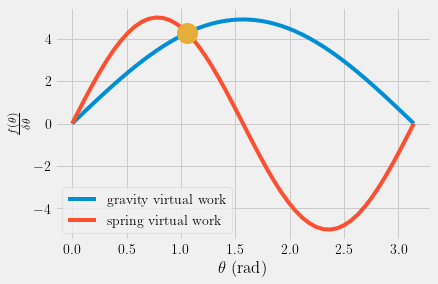

In [3]:
m = 1
l = 1
k = 10
g = 9.81
theta = np.linspace(0,np.pi)
Wgrav = m*g*l/2*np.sin(theta)
Wspr = k*l*(np.cos(theta))*l*np.sin(theta)

theta_sol = np.arccos(m*g/2/k/l)

plt.plot(theta, Wgrav, label = 'gravity virtual work')
plt.plot(theta, Wspr, label = 'spring virtual work')
plt.plot(theta_sol, m*g*l/2*np.sin(theta_sol),'o', markersize=20)
plt.xlabel(r'$\theta$ (rad)');
plt.ylabel(r'$\frac{f(\theta)}{\delta \theta}$')
plt.legend();

In [6]:
theta_sol*180/np.pi

60.626549578274364

## What does a dynamic solution look like?

$\delta T = \left[\frac{\partial T}{\partial \theta} - \frac{d}{dt}\left(\frac{\partial T}{\partial\dot{\theta}}\right)\right]\delta \theta$

$T = \frac{1}{2}I_O\dot{\theta}^2$

$I_O = \frac{ml^2}{3}$

$\delta T = -\frac{ml^2}{3}\ddot{\theta}\delta \theta$


Now, plug in the virtual work from before. 

$\delta T = \delta W$

$-\frac{ml^2}{3}\ddot{\theta} = mg\frac{l}{2}\sin\theta - kl\cos\theta l\sin\theta$

$\ddot{\theta} =  \frac{3k}{m}\cos\theta\sin\theta - \frac{3g}{2l}\sin\theta$

In [9]:
def support_pendulum(t,y):
    dy = np.zeros(y.shape)
    dy[0] = y[1]
    dy[1] = 3*k/m*np.cos(y[0])*np.sin(y[0])-3*g/2/l*np.sin(y[0])
    return dy

In [10]:
support_pendulum(0,np.array([theta_sol,10]))

array([ 1.00000000e+01, -1.77635684e-15])

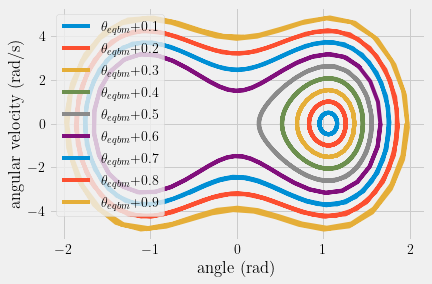

In [13]:
for i in range(1,10):
    perturb = 0.1*i
    sol = solve_ivp(support_pendulum, 
                    [0,6], # time 
                    np.array([theta_sol+perturb, 0]), # initial conditions theta(t=0)= eqbm+perturb-angle, dtheta/dt = 0 
                    t_eval = np.linspace(0,6, 100))
    plt.plot(sol.y[0], sol.y[1], label = r'$\theta_{eqbm}$'+'+{:.1f}'.format(perturb))

plt.xlabel('angle (rad)')
plt.ylabel('angular velocity (rad/s)')
plt.legend()

## _Extra_: Try to build a linear system for small angles

Normally, you can use a Taylor series around $\theta=0$ to solve, but the equilibrium position is not $\theta=0$. You know that when $\ddot{\theta}=0$, the equilibrium position is 

$\cos\theta_{eqbm}=\frac{mg}{2kl}$.

Take an extra 2 steps:

1. substitute $\phi = \theta -\theta_{eqbm}$
2. expand the equation of motion about $\theta_{eqbm}$

$\sin(\phi + \theta_{eqbm}) \approx \phi + \theta_{eqbm}$

$\cos(\phi + \theta_{eqbm}) \approx 1$

Now, the linearized equation of motion is as such

$\ddot{\phi} = (\frac{3k}{m} - \frac{3g}{2l})(\phi + \theta_{eqbm})$

separated into homogeneous and particular solutions, 

$\phi(t) = \phi_H(t) + \phi_P(t) = A\cos\omega t +B\sin\omega t +\phi_P$

$\ddot{\phi}_H =(\frac{3k}{m} - \frac{3g}{2l})\phi_H$

and

$\ddot{\phi}_P = 0 \rightarrow \phi_P = -\theta_{eqbm}$

Using intial conditions, $\phi(0) = 0$ and $\dot{\phi}(0) = \phi_0$

$\phi(t) = \theta_{eqbm}\cos\omega t +\frac{\dot{\phi_0}}{\omega}\sin\omega t-\theta_{eqbm}$

where 

$\omega = \sqrt{\frac{3g}{2l} -\frac{3k}{m}}$

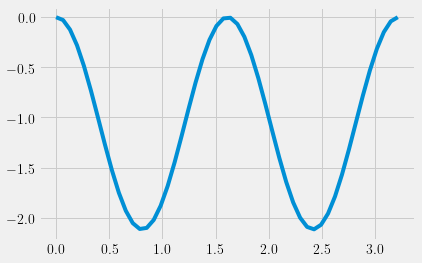

In [133]:
dphi0 = 0.1

w = np.sqrt(-3*g/2/l+3*k/m)
t = np.linspace(0,4*np.pi/w)

phi = theta_sol*np.cos(w*t) + dphi0/w*np.sin(w*t) - theta_sol

plt.plot(t,phi)

In [108]:
3*k/m*np.cos(sol)*np.cos(sol)-3*g/2/l*np.sin(sol)

TypeError: loop of ufunc does not support argument 0 of type OdeResult which has no callable cos method